In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
#data import
import wget
import urllib

# regex
import re

#time
import pytz as tz
from datetime import datetime

#data explore
import numpy as np
np.random.seed(1337)

#support for reading excel files
import xlrd

# dataframes in python
import pandas as pd

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

#defaults
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams.update({'font.size': 10})
plt.rcParams['xtick.major.pad']='5'
plt.rcParams['ytick.major.pad']='5'

plt.style.use('ggplot')

In [8]:
df = pd.read_excel(r'D:\default of credit card clients.xls', header=1)

In [9]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [10]:
df.columns = [x.lower() for x in df.columns]
df = df.rename(index=str, columns={"pay_0": "pay_1"})
df = df.drop('id', axis=1)
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object')

In [11]:
print("Explanatory variables:  {}".format(len(df.columns)-1))
print("Number of Observations: {}".format(df.shape[0]))

df['target'] = df['default payment next month'].astype('category')

# create a 'target' column for our own convenience
print("Target variable:       '{}' -> '{}'".format('default payment next month', 'target'))

Explanatory variables:  23
Number of Observations: 30000
Target variable:       'default payment next month' -> 'target'


In [12]:
pattern = re.compile("^pay_[0-9]+$")
pay_status_columns = [ x for x in df.columns if (pattern.match(x))]

df[pay_status_columns].head(10)

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,-1,-1,0,0,-1
8,0,0,2,0,0,0
9,-2,-2,-2,-2,-1,-1


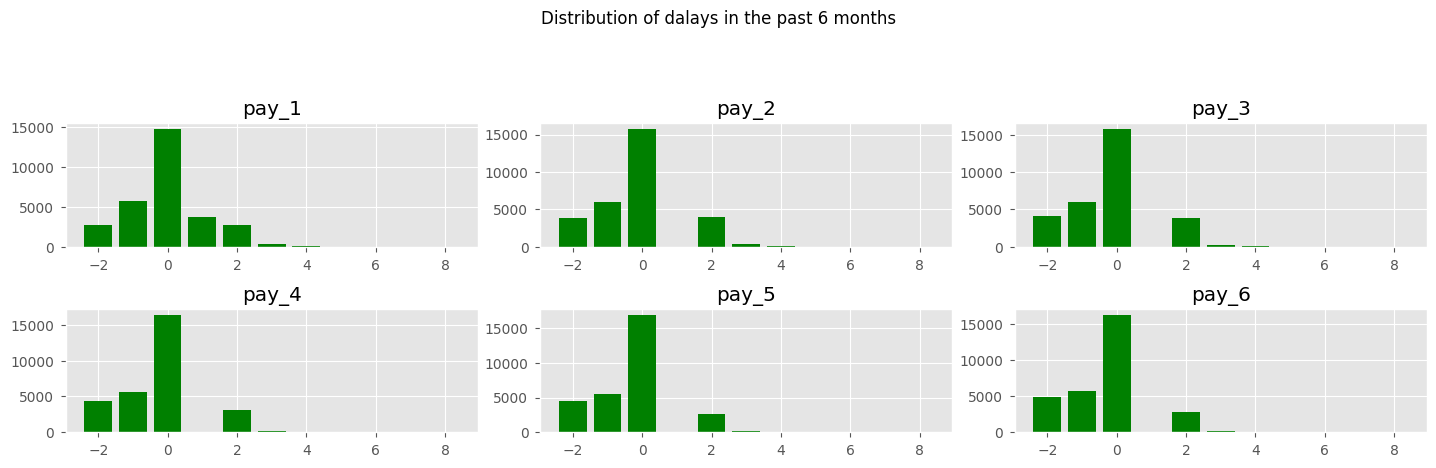

In [13]:
# pay status columns
pattern = re.compile("^pay_[0-9]+$")
pay_status_columns = [ x for x in df.columns if (pattern.match(x))]

fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle('Distribution of dalays in the past 6 months')

for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = df[pay_status_columns[i]].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='g')
    ax[row,col].set_title(pay_status_columns[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

In [14]:
# bill columns
pattern = re.compile("^bill_amt[0-9]+$")
bill_columns = [ x for x in df.columns if (pattern.match(x))]
df[bill_columns].describe()

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [15]:
# pay status columns
pattern = re.compile("^pay_amt[0-9]+$")
pay_amount_columns = [ x for x in df.columns if (pattern.match(x))]
df[pay_amount_columns].describe()

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


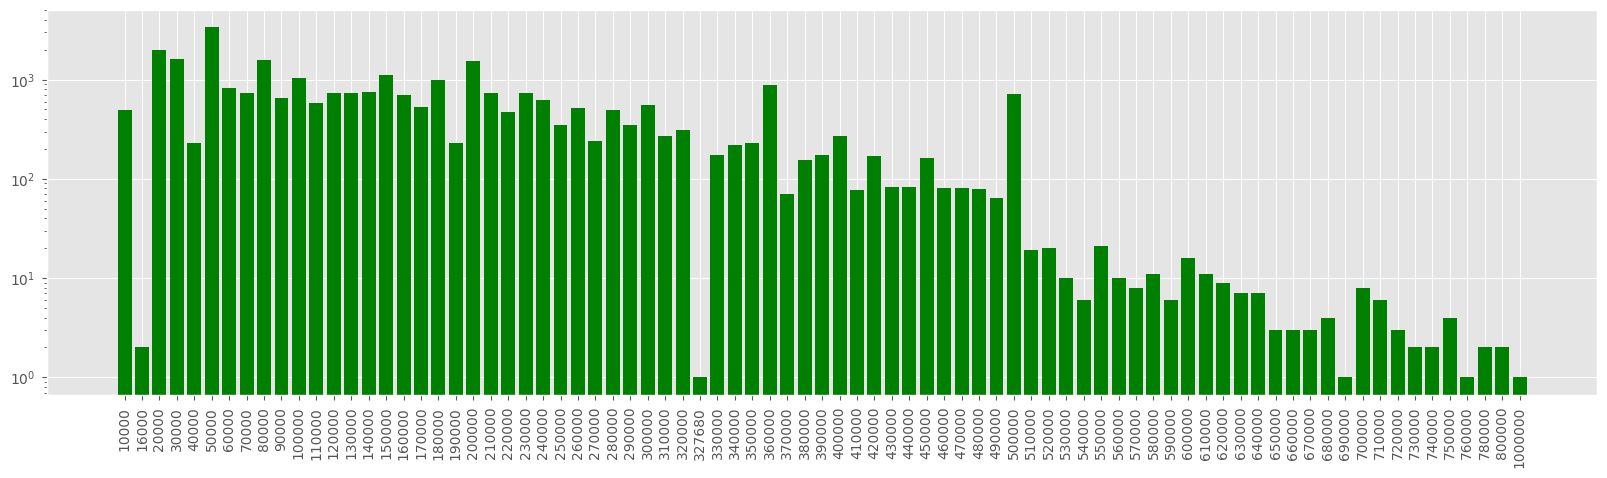

In [19]:
# limit balance
fig = plt.figure()
fig.set_size_inches(20,5)
ax = fig.add_subplot(111)

d = df.groupby(['limit_bal']).size()
ax.set_yscale("log")
ax.set_xticks(np.arange(len(d)))
ax.set_xticklabels(['%d' % i for i in d.index], rotation='vertical')
p = ax.bar(np.arange(len(d)), d, color='green')

defaulting accounts are 22.12% out of 30000 observations


C:\Users\Babua\AppData\Local\Temp\ipykernel_2436\297017344.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = df.groupby(['target']).size()


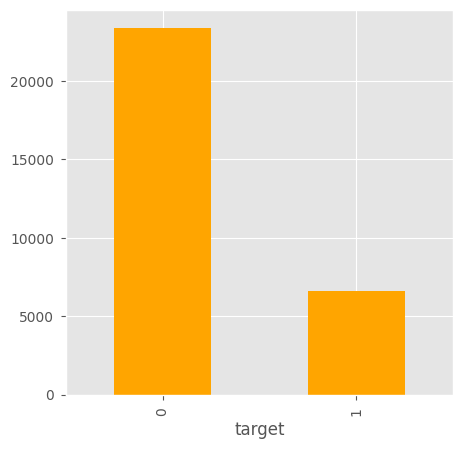

In [23]:
fig = plt.figure()
fig.set_size_inches(5,5)
d = df.groupby(['target']).size()

print("defaulting accounts are {}% out of {} observations".format(100* d[1]/(d[1]+d[0]), d[1]+d[0]))
p = d.plot(kind='bar', color='orange')

In [24]:
df['sex'] = df['sex'].astype('category').cat.rename_categories(['M', 'F'])
df['marriage'] = df['marriage'].astype('category').cat.rename_categories(['na', 'married', 'single', 'other'])

In [25]:
df['age_cat'] = pd.cut(df['age'], range(0, 100, 10), right=False)

In [26]:
pattern = re.compile("^pay_[0-9]+$")
pay_status_columns = [ x for x in df.columns if (pattern.match(x))]
for i in pay_status_columns:
    df[i] = df[i].astype('category')

C:\Users\Babua\AppData\Local\Temp\ipykernel_2436\2773882422.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = df.groupby(['target', 'sex']).size()
C:\Users\Babua\AppData\Local\Temp\ipykernel_2436\2773882422.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = df.groupby(['target', 'marriage']).size()
C:\Users\Babua\AppData\Local\Temp\ipykernel_2436\2773882422.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

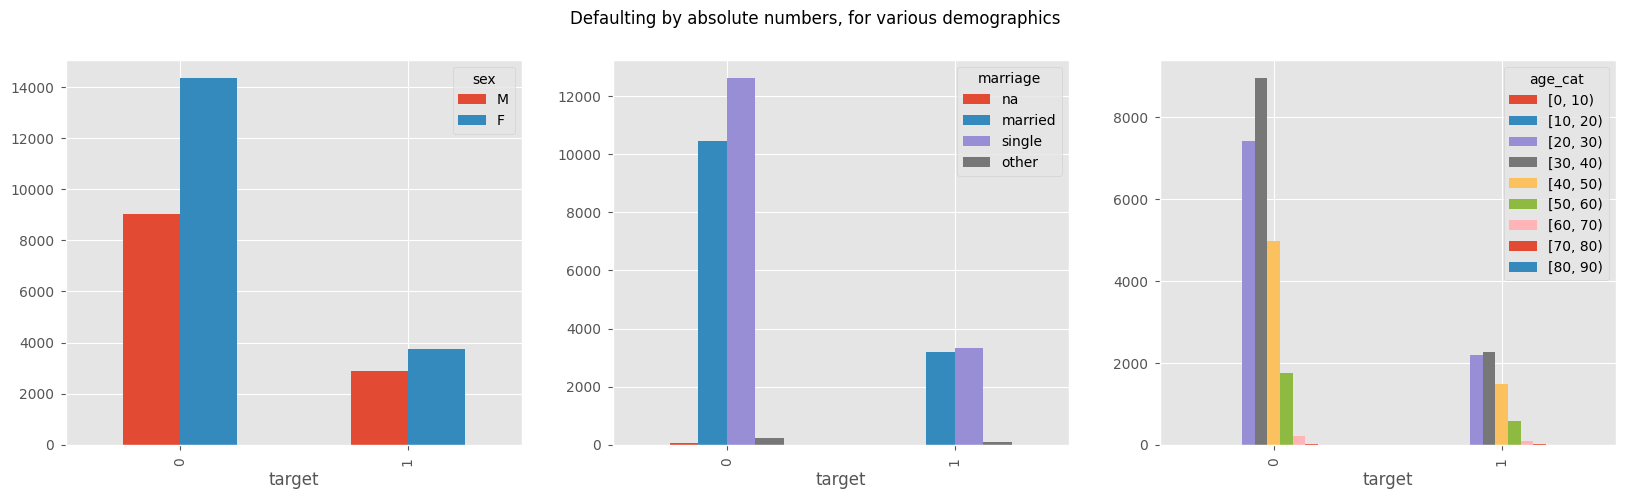

In [27]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('Defaulting by absolute numbers, for various demographics')

d = df.groupby(['target', 'sex']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

d = df.groupby(['target', 'marriage']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])

d = df.groupby(['target', 'age_cat']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2])

C:\Users\Babua\AppData\Local\Temp\ipykernel_2436\3137050011.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = df.groupby(['target', 'sex']).size().unstack(level=1)
C:\Users\Babua\AppData\Local\Temp\ipykernel_2436\3137050011.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = df.groupby(['target', 'marriage']).size().unstack(level=1)
C:\Users\Babua\AppData\Local\Temp\ipykernel_2436\3137050011.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future de

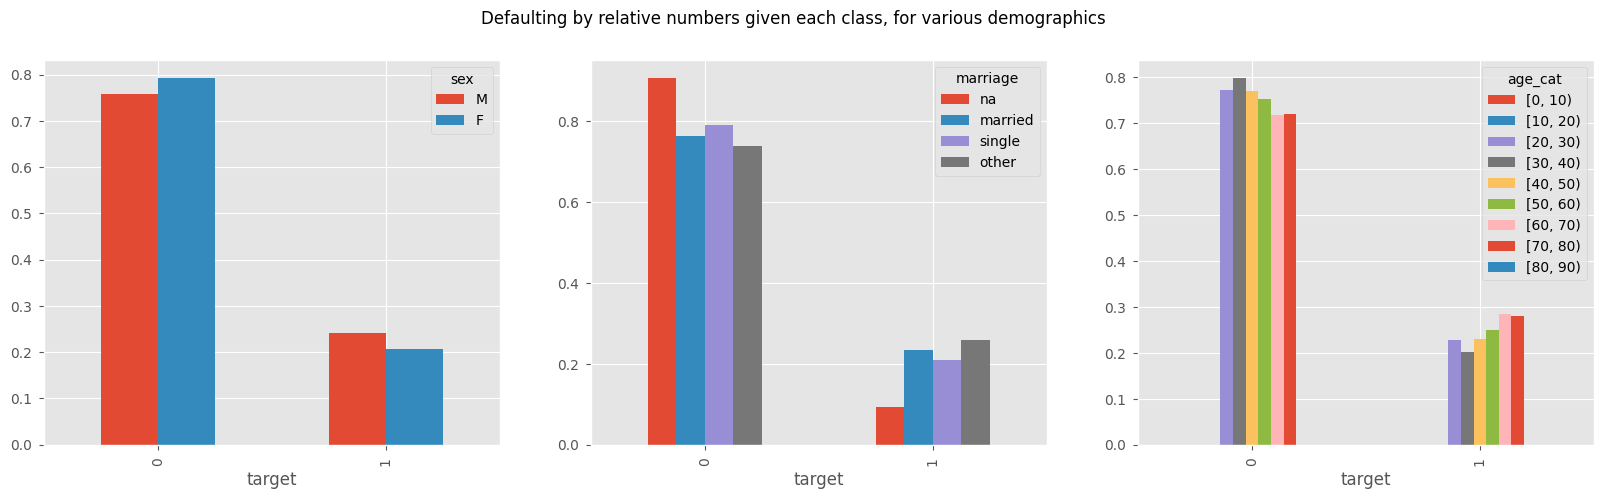

In [28]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('Defaulting by relative numbers given each class, for various demographics')

d = df.groupby(['target', 'sex']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[0])

d = df.groupby(['target', 'marriage']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1])

d = df.groupby(['target', 'age_cat']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[2])

In [29]:
# help func
def selcols(prefix, a=1, b=6):
    return [prefix+str(i) for i in np.arange(a,b+1)]

In [30]:
from math import log

# average and standard deviation payment status
df['pay_avg'] = df[selcols('pay_')].mean(axis=1)
df['pay_std'] = df[selcols('pay_')].std(axis=1)

In [31]:
# average payment
df['pay_amt_avg']     = df[selcols('pay_amt')].mean(axis=1)

# log of average
df['pay_amt_avg_log'] = df['pay_amt_avg'].apply(lambda x: log(x+1))

#amounts relative to the average payment
for i in np.arange(1,7):
    df['pay_relamt'+str(i)] = df['pay_amt'+str(i)]/df['pay_amt_avg']

# log of payments
for i in np.arange(1,7):
    df['pay_amt_log'+str(i)] = df['pay_amt'+str(i)].apply(lambda x: log(x+1))

In [32]:
# average bill
df['bill_amt_avg'] = df[selcols('bill_amt')].mean(axis=1)
df['bill_amt_avg_log'] = df['bill_amt_avg'].apply(lambda x: log(x+1) if x>0 else 0)

# bill sign as a separate feature
for i in np.arange(1,7):
    df['bill_amt_sign'+str(i)] = df['bill_amt'+str(i)].apply(lambda x: float(x>0))
    
# bill log as a separate feature (0 if bill is negative)
for i in np.arange(1,7):
    df['bill_amt_log'+str(i)] = df['bill_amt'+str(i)].apply(lambda x: log(x+1) if x>0 else 0)
    
#bill amounts relative to the limit
for i in np.arange(1,7):
    df['bill_relamt'+str(i)] = df['bill_amt'+str(i)]/df['limit_bal']

In [33]:
#log of credit limit
df['limit_bal_log'] = df['limit_bal'].apply(lambda x: log(x+1))
df['limit_bal_cat'] = pd.cut(df['limit_bal'], range(0, int(1e6), 10000), right=False)

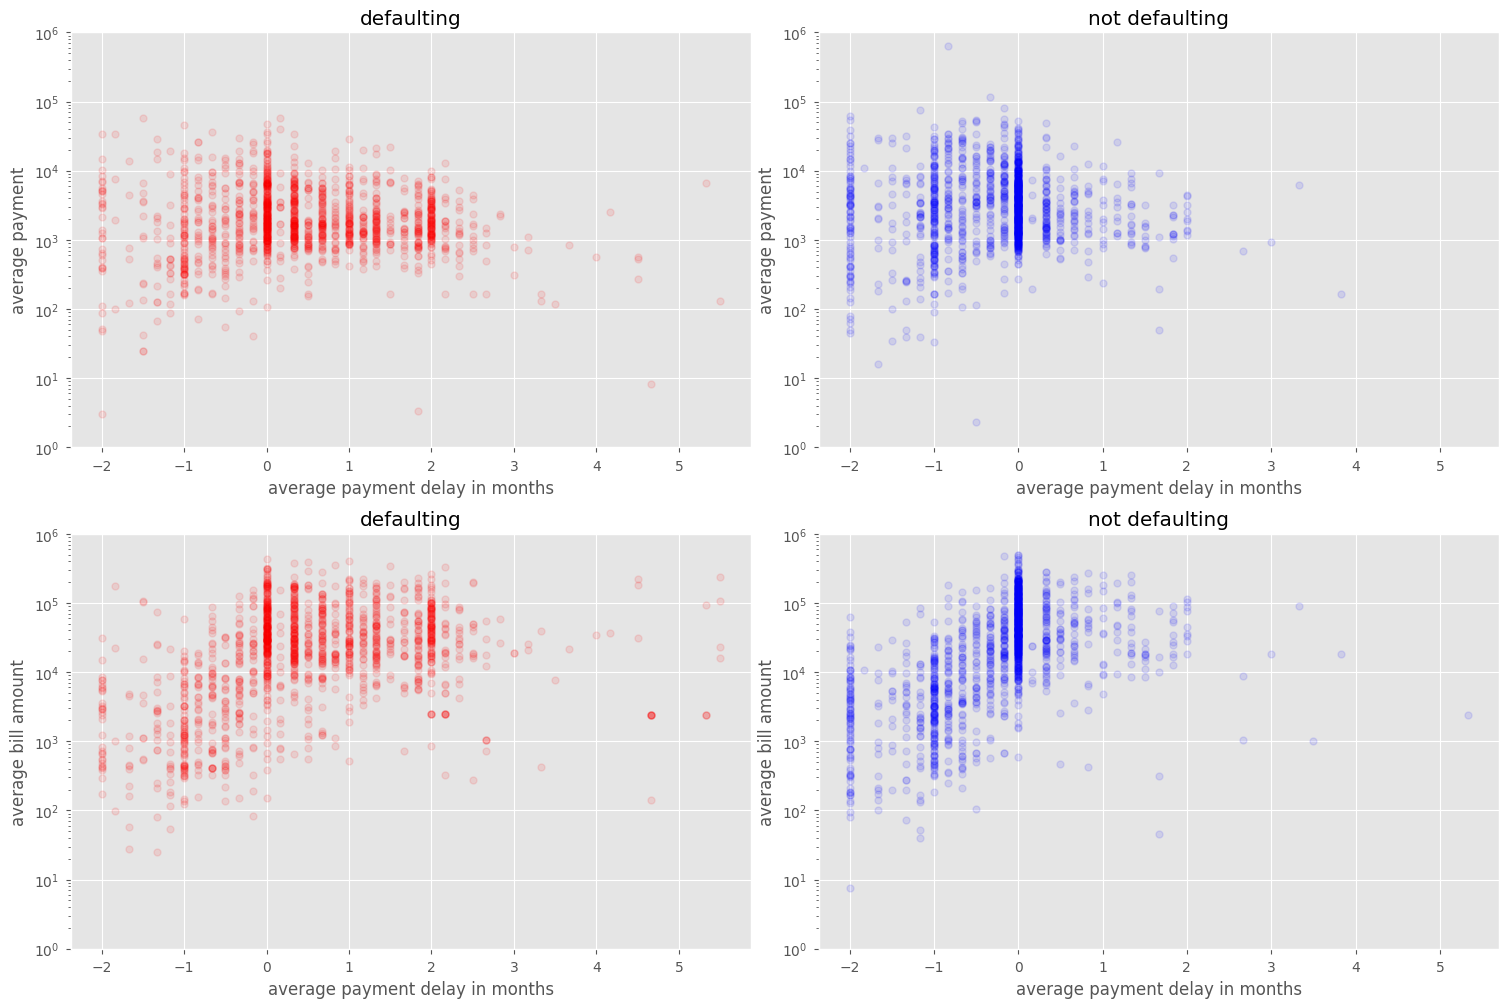

In [46]:
def_no = df[df['target']==0].sample(1500)
def_yes  = df[df['target']==1].sample(1500)

fig,ax = plt.subplots(2,2)
fig.set_size_inches(15,10)

ax[0,0].set_ylim([1,1e6])
ax[0,0].set_title('defaulting')
ax[0,0].set_ylabel('average payment')
ax[0,0].set_xlabel('average payment delay in months')
p = ax[0,0].semilogy(def_yes['pay_avg'], def_yes['pay_amt_avg'], 'ro', markersize=5, alpha=0.1)

ax[0,1].set_ylim([1,1e6])
ax[0,1].set_title('not defaulting')
ax[0,1].set_ylabel('average payment')
ax[0,1].set_xlabel('average payment delay in months')
p = ax[0,1].semilogy(def_no['pay_avg'], def_no['pay_amt_avg'], 'bo', markersize=5, alpha=0.1)

ax[1,0].set_ylim([1,1e6])
ax[1,0].set_title('defaulting')
ax[1,0].set_ylabel('average bill amount')
ax[1,0].set_xlabel('average payment delay in months')
p = ax[1,0].semilogy(def_yes['pay_avg'], def_yes['bill_amt_avg'], 'ro', markersize=5, alpha=0.1)

ax[1,1].set_ylim([1,1e6])
ax[1,1].set_title('not defaulting')
ax[1,1].set_ylabel('average bill amount')
ax[1,1].set_xlabel('average payment delay in months')
p = ax[1,1].semilogy(def_no['pay_avg'], def_no['bill_amt_avg'], 'bo', markersize=5, alpha=0.1)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [49]:
from patsy import dmatrices

formula  = 'target ~ '

# original features
formula += 'C(sex) + C(marriage) +  C(education) + age'
formula += '+' + '+'.join(selcols('pay_'))

#### engineered / normalized features

# categorical age and credit limit (binned)
formula += '+' + 'C(age_cat)'
formula += '+' + 'C(limit_bal_cat) + limit_bal_log'

#pay delays
formula += '+' + 'pay_avg + pay_std'
    
#pay_amt
formula += '+' + 'pay_amt_avg_log'
formula += '+' + '+'.join(selcols('pay_relamt'))
formula += '+' + '+'.join(selcols('pay_amt_log'))

# bill amounts
formula += '+' + 'bill_amt_avg_log'
formula += '+' + '+'.join(selcols('bill_relamt'))
formula += '+' + '+'.join(selcols('bill_amt_sign'))
formula += '+' + '+'.join(selcols('bill_amt_log'))

y, X = dmatrices(formula, data=df, return_type='dataframe')
y = y.iloc[:, 1]

In [50]:
df

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_log5,bill_amt_log6,bill_relamt1,bill_relamt2,bill_relamt3,bill_relamt4,bill_relamt5,bill_relamt6,limit_bal_log,limit_bal_cat
0,20000,F,2,married,24,2,2,-1,-1,-2,...,0.000000,0.000000,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,9.903538,"[20000, 30000)"
1,120000,F,2,single,26,-1,2,0,0,0,...,8.147867,8.090096,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,11.695255,"[120000, 130000)"
2,90000,F,2,single,34,0,0,0,0,0,...,9.612400,9.651816,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,11.407576,"[90000, 100000)"
3,50000,F,2,married,37,0,0,0,0,0,...,10.273671,10.293771,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,10.819798,"[50000, 60000)"
4,50000,M,2,married,57,-1,0,-1,0,0,...,9.859901,9.859118,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,10.819798,"[50000, 60000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,M,3,married,39,0,0,0,0,0,...,10.349391,9.679156,0.858855,0.876432,0.947114,0.400018,0.141986,0.072636,12.301387,"[220000, 230000)"
29996,150000,M,3,single,43,-1,-1,-1,-1,0,...,8.554682,0.000000,0.011220,0.012187,0.023347,0.059860,0.034600,0.000000,11.918397,"[150000, 160000)"
29997,30000,M,2,single,37,4,3,2,-1,0,...,9.932221,9.870861,0.118833,0.111867,0.091933,0.695933,0.686067,0.645233,10.308986,"[30000, 40000)"
29998,80000,M,3,married,41,1,-1,0,0,0,...,9.380589,10.798452,-0.020563,0.979738,0.953800,0.659675,0.148187,0.611800,11.289794,"[80000, 90000)"


In [51]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix

def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

    fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])

In [55]:
import warnings
from sklearn.feature_selection import SelectKBest, f_classif

warnings.simplefilter(action='ignore', category=(UserWarning,RuntimeWarning))

selector = SelectKBest(f_classif)
selector.fit(X, y)

SelectKBest()

In [62]:
X

,Intercept,C(sex)[T.F],C(marriage)[T.married],C(marriage)[T.single],C(marriage)[T.other],C(education)[T.1],C(education)[T.2],C(education)[T.3],C(education)[T.4],C(education)[T.5],...,bill_amt_sign3,bill_amt_sign4,bill_amt_sign5,bill_amt_sign6,bill_amt_log1,bill_amt_log2,bill_amt_log3,bill_amt_log4,bill_amt_log5,bill_amt_log6
0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,8.272315,8.040125,6.536692,0.000000,0.000000,0.000000
1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,7.894691,7.453562,7.894691,8.093462,8.147867,8.090096
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,10.283293,9.548811,9.514880,9.570250,9.612400,9.651816
3,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,10.757711,10.783819,10.805517,10.251147,10.273671,10.293771
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,9.061608,8.643121,10.486708,9.949464,9.859901,9.859118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,12.149232,12.169492,12.247051,11.385149,10.349391,9.679156
29996,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,7.428927,7.511525,8.161375,9.102755,8.554682,0.000000
29997,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,8.179200,8.118803,7.922624,9.946499,9.932221,9.870861
29998,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.000000,11.269324,11.242494,10.873793,9.380589,10.798452


In [57]:
top_indices = np.nan_to_num(selector.scores_).argsort()[-10:][::-1]
selector.scores_[top_indices]
X.columns[top_indices]

Index(['pay_1[T.2]', 'pay_2[T.2]', 'pay_avg', 'pay_3[T.2]', 'pay_4[T.2]',
       'pay_5[T.2]', 'pay_std', 'pay_6[T.2]', 'pay_1[T.0]', 'limit_bal_log'],
      dtype='object')

In [64]:
top_indices

array([ 14,  24, 177,  34,  44,  53, 178,  62,  12, 176])

In [67]:
X[X.columns[top_indices]].corr()

,pay_1[T.2],pay_2[T.2],pay_avg,pay_3[T.2],pay_4[T.2],pay_5[T.2],pay_std,pay_6[T.2],pay_1[T.0],limit_bal_log
pay_1[T.2],1.000000,0.420552,0.412041,0.322803,0.304091,0.287620,0.237676,0.266179,-0.321547,-0.134707
pay_2[T.2],0.420552,1.000000,0.525626,0.526637,0.389973,0.356179,0.339627,0.324028,-0.395985,-0.192539
pay_avg,0.412041,0.525626,1.000000,0.535422,0.540737,0.527080,0.272481,0.497748,0.152417,-0.342820
pay_3[T.2],0.322803,0.526637,0.535422,1.000000,0.542747,0.397540,0.352038,0.366851,-0.214728,-0.188792
pay_4[T.2],0.304091,0.389973,0.540737,0.542747,1.000000,0.581603,0.284150,0.418089,-0.156545,-0.183322
pay_5[T.2],0.287620,0.356179,0.527080,0.397540,0.581603,1.000000,0.214064,0.589209,-0.137979,-0.163874
pay_std,0.237676,0.339627,0.272481,0.352038,0.284150,0.214064,1.000000,0.220574,-0.366488,-0.178035
pay_6[T.2],0.266179,0.324028,0.497748,0.366851,0.418089,0.589209,0.220574,1.000000,-0.113164,-0.159945
pay_1[T.0],-0.321547,-0.395985,0.152417,-0.214728,-0.156545,-0.137979,-0.366488,-0.113164,1.000000,-0.087176
limit_bal_log,-0.134707,-0.192539,-0.342820,-0.188792,-0.183322,-0.163874,-0.178035,-0.159945,-0.087176,1.000000


In [68]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [69]:
from sklearn.pipeline import Pipeline

preprocess = Pipeline([('anova', selector), ('scale', scaler)])
preprocess.fit(X,y)

X_prep = preprocess.transform(X)

In [75]:
X

,Intercept,C(sex)[T.F],C(marriage)[T.married],C(marriage)[T.single],C(marriage)[T.other],C(education)[T.1],C(education)[T.2],C(education)[T.3],C(education)[T.4],C(education)[T.5],...,bill_amt_sign3,bill_amt_sign4,bill_amt_sign5,bill_amt_sign6,bill_amt_log1,bill_amt_log2,bill_amt_log3,bill_amt_log4,bill_amt_log5,bill_amt_log6
0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,8.272315,8.040125,6.536692,0.000000,0.000000,0.000000
1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,7.894691,7.453562,7.894691,8.093462,8.147867,8.090096
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,10.283293,9.548811,9.514880,9.570250,9.612400,9.651816
3,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,10.757711,10.783819,10.805517,10.251147,10.273671,10.293771
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,9.061608,8.643121,10.486708,9.949464,9.859901,9.859118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,12.149232,12.169492,12.247051,11.385149,10.349391,9.679156
29996,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,7.428927,7.511525,8.161375,9.102755,8.554682,0.000000
29997,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,8.179200,8.118803,7.922624,9.946499,9.932221,9.870861
29998,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.000000,11.269324,11.242494,10.873793,9.380589,10.798452


In [86]:
data_prep=pd.DataFrame(X_prep,columns=X.columns[top_indices])

In [87]:
data_prep['target']=list(y)

In [88]:
data_prep

,pay_1[T.2],pay_2[T.2],pay_avg,pay_3[T.2],pay_4[T.2],pay_5[T.2],pay_std,pay_6[T.2],pay_1[T.0],limit_bal_log,target
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.158172,0.222222,0.581087,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.567060,0.333333,0.382235,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.501408,0.266667,0.000000,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.367272,0.266667,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.367272,0.222222,0.161165,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28562,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.705385,0.266667,0.000000,0.0
28563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.617983,0.177778,0.161165,0.0
28564,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.250699,0.444444,0.613696,1.0
28565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.474529,0.244444,0.234936,1.0


In [95]:
# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_prep[list(set(data_prep.columns) - set(['target']))])

In [96]:
# Step 2: Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

In [97]:
# Step 3: Create a new DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

In [99]:
pca_df['target']=data_prep['target']

<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

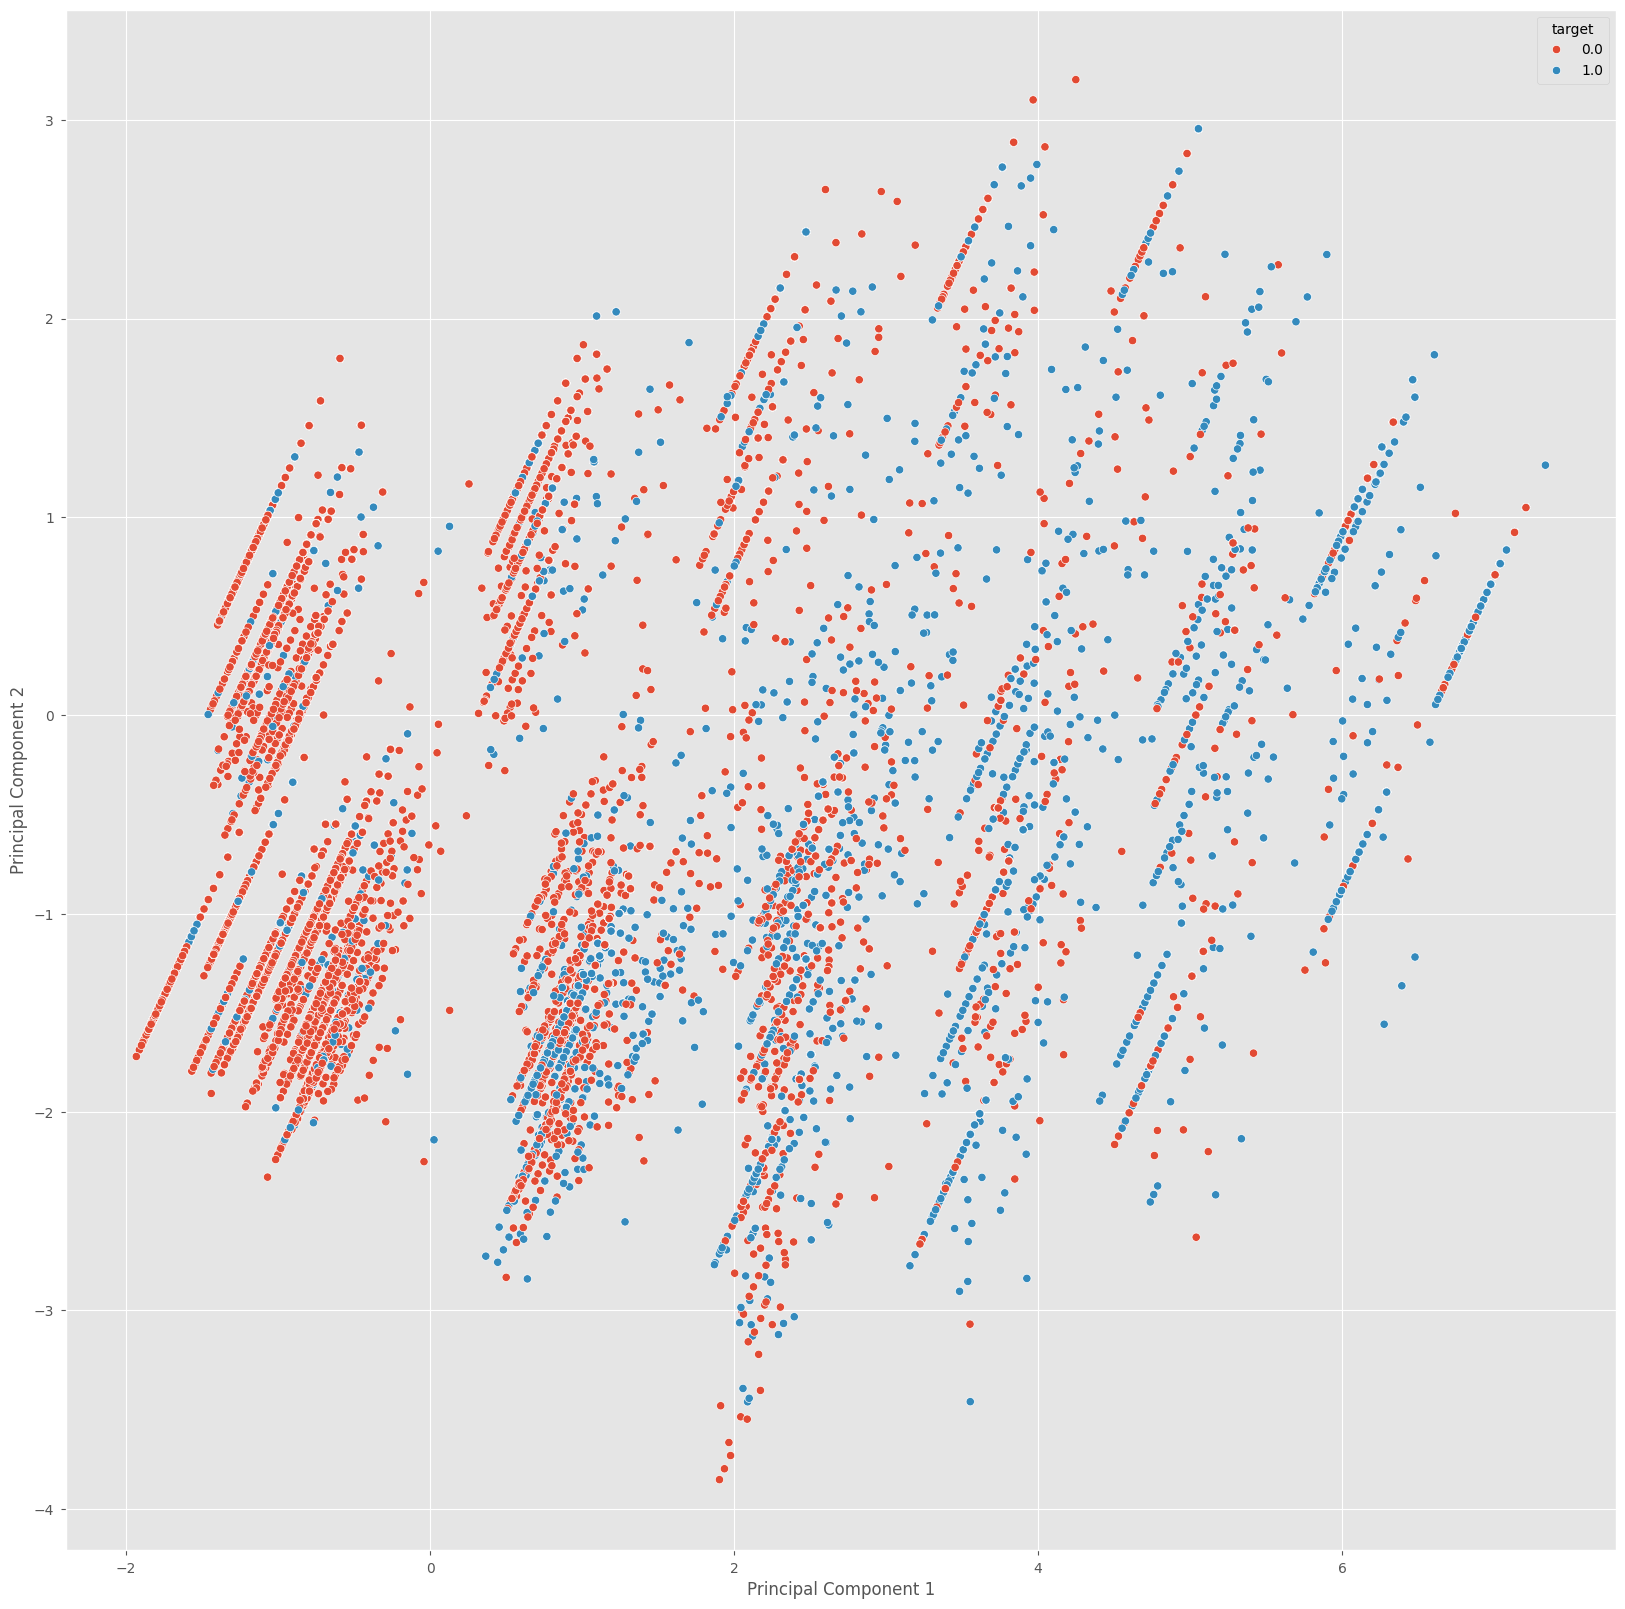

In [101]:
sns.scatterplot(data=pca_df,x='Principal Component 1',y='Principal Component 2',hue='target')

In [100]:
pca_df

,Principal Component 1,Principal Component 2,target
0,2.507685,-2.644639,1.0
1,2.311254,-1.051588,1.0
2,-0.998735,1.121642,0.0
3,-0.890121,1.302955,0.0
4,-0.445072,-0.589750,0.0
...,...,...,...
28562,-1.163899,0.845926,0.0
28563,-0.790517,-1.054533,0.0
28564,2.219071,-0.875161,1.0
28565,-0.338128,-0.830394,1.0


In [123]:
pca_df[['Principal Component 1','Principal Component 2']]

,Principal Component 1,Principal Component 2
0,2.507685,-2.644639
1,2.311254,-1.051588
2,-0.998735,1.121642
3,-0.890121,1.302955
4,-0.445072,-0.589750
...,...,...
28562,-1.163899,0.845926
28563,-0.790517,-1.054533
28564,2.219071,-0.875161
28565,-0.338128,-0.830394


In [121]:
pca_df.loc[0:2,['target','Principal Component 1','Principal Component 2']]

,target,Principal Component 1,Principal Component 2
0,1.0,2.507685,-2.644639
1,1.0,2.311254,-1.051588
2,0.0,-0.998735,1.121642


In [142]:
import kmapper as km
from sklearn.cluster import DBSCAN

# Initialize the KeplerMapper object
mapper = km.KeplerMapper()
projected_data = mapper.fit_transform(np.array(pca_df[['Principal Component 1','Principal Component 2']]))
# Create a cover for the Mapper algorithm
cover = km.Cover(n_cubes=10, perc_overlap=0.5)
# Map the projected data to create a graph using DBSCAN for clustering
graph = mapper.map(projected_data,
                    X=np.array(pca_df[['Principal Component 1','Principal Component 2']]),
                    clusterer=DBSCAN(eps=0.5, min_samples=100),
                    cover=cover)


In [143]:
mapper.visualize(graph,
                 path_html="mapper_output.html",
                 title="Mapper Output with Anomalies",
                 )
from IPython.display import IFrame
IFrame('mapper_output.html', width='100%', height=700)

In [144]:
reverse_mapping = {}
for key, indices in graph['nodes'].items():
    for index in indices:
        if index not in reverse_mapping:
            reverse_mapping[index] = []
        reverse_mapping[index].append(key)
pca_df['id']=pca_df.index
# Add a new column to the DataFrame based on the reverse mapping
pca_df['new_column'] = pca_df['id'].map(reverse_mapping).apply(lambda i: i if isinstance(i, list) else [])

print(pca_df)

       Principal Component 1  Principal Component 2  target     id  \
0                   2.507685              -2.644639     1.0      0   
1                   2.311254              -1.051588     1.0      1   
2                  -0.998735               1.121642     0.0      2   
3                  -0.890121               1.302955     0.0      3   
4                  -0.445072              -0.589750     0.0      4   
...                      ...                    ...     ...    ...   
28562              -1.163899               0.845926     0.0  28562   
28563              -0.790517              -1.054533     0.0  28563   
28564               2.219071              -0.875161     1.0  28564   
28565              -0.338128              -0.830394     1.0  28565   
28566              -0.890121               1.302955     1.0  28566   

                             new_column  participation  
0      [cube2_cluster0, cube3_cluster0]              2  
1      [cube3_cluster0, cube4_cluster0]      

In [145]:
pca_df

,Principal Component 1,Principal Component 2,target,id,new_column,participation
0,2.507685,-2.644639,1.0,0,"[cube2_cluster0, cube3_cluster0]",2
1,2.311254,-1.051588,1.0,1,"[cube3_cluster0, cube4_cluster0]",2
2,-0.998735,1.121642,0.0,2,"[cube2_cluster1, cube3_cluster0]",2
3,-0.890121,1.302955,0.0,3,"[cube2_cluster1, cube3_cluster0]",2
4,-0.445072,-0.589750,0.0,4,"[cube1_cluster0, cube2_cluster1]",2
...,...,...,...,...,...,...
28562,-1.163899,0.845926,0.0,28562,"[cube2_cluster1, cube3_cluster0]",2
28563,-0.790517,-1.054533,0.0,28563,"[cube0_cluster0, cube1_cluster0]",2
28564,2.219071,-0.875161,1.0,28564,"[cube3_cluster0, cube4_cluster0]",2
28565,-0.338128,-0.830394,1.0,28565,"[cube1_cluster0, cube2_cluster1]",2


In [146]:
df.tail(20)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_log5,bill_amt_log6,bill_relamt1,bill_relamt2,bill_relamt3,bill_relamt4,bill_relamt5,bill_relamt6,limit_bal_log,limit_bal_cat
29980,50000,M,3,single,42,0,0,0,0,0,...,9.902087,9.888120,0.879960,0.982460,0.987940,1.007200,0.399420,0.393880,10.819798,"[50000, 60000)"
29981,50000,M,2,married,44,1,2,2,2,0,...,10.029106,9.592059,0.773420,0.735440,0.662020,0.563840,0.453520,0.292940,10.819798,"[50000, 60000)"
29982,90000,M,2,married,36,0,0,0,0,0,...,9.395741,9.570111,0.086133,0.101244,0.114511,0.125867,0.133733,0.159211,11.407576,"[90000, 100000)"
29983,20000,M,2,married,44,-2,-2,-2,-2,-2,...,9.130864,7.450080,0.091100,0.143600,0.135600,0.144100,0.461750,0.085950,9.903538,"[20000, 30000)"
29984,30000,M,2,single,38,-1,-1,-2,-1,-1,...,7.553811,8.107720,0.010500,0.030767,0.097967,0.066433,0.063567,0.110633,10.308986,"[30000, 40000)"
29985,240000,M,1,single,30,-2,-2,-2,-2,-2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.388398,"[240000, 250000)"
29986,360000,M,1,single,35,-1,-1,-2,-2,-2,...,0.000000,0.000000,0.006167,0.000000,0.000000,0.000000,0.000000,0.000000,12.793862,"[360000, 370000)"
29987,130000,M,1,single,34,0,0,0,0,0,...,11.447950,11.486109,0.179169,0.108285,0.119585,0.831131,0.720831,0.748869,11.775297,"[130000, 140000)"
29988,250000,M,1,married,34,0,0,0,0,0,...,12.072576,12.098977,1.118560,1.011652,0.972300,0.983000,0.700020,0.718748,12.429220,"[250000, 260000)"
29989,150000,M,1,single,35,-1,-1,-1,-1,-1,...,0.000000,0.000000,0.022833,0.060060,-0.000020,0.005200,0.000000,0.000000,11.918397,"[150000, 160000)"


In [147]:
df.tail(20)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_log5,bill_amt_log6,bill_relamt1,bill_relamt2,bill_relamt3,bill_relamt4,bill_relamt5,bill_relamt6,limit_bal_log,limit_bal_cat
29980,50000,M,3,single,42,0,0,0,0,0,...,9.902087,9.888120,0.879960,0.982460,0.987940,1.007200,0.399420,0.393880,10.819798,"[50000, 60000)"
29981,50000,M,2,married,44,1,2,2,2,0,...,10.029106,9.592059,0.773420,0.735440,0.662020,0.563840,0.453520,0.292940,10.819798,"[50000, 60000)"
29982,90000,M,2,married,36,0,0,0,0,0,...,9.395741,9.570111,0.086133,0.101244,0.114511,0.125867,0.133733,0.159211,11.407576,"[90000, 100000)"
29983,20000,M,2,married,44,-2,-2,-2,-2,-2,...,9.130864,7.450080,0.091100,0.143600,0.135600,0.144100,0.461750,0.085950,9.903538,"[20000, 30000)"
29984,30000,M,2,single,38,-1,-1,-2,-1,-1,...,7.553811,8.107720,0.010500,0.030767,0.097967,0.066433,0.063567,0.110633,10.308986,"[30000, 40000)"
29985,240000,M,1,single,30,-2,-2,-2,-2,-2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.388398,"[240000, 250000)"
29986,360000,M,1,single,35,-1,-1,-2,-2,-2,...,0.000000,0.000000,0.006167,0.000000,0.000000,0.000000,0.000000,0.000000,12.793862,"[360000, 370000)"
29987,130000,M,1,single,34,0,0,0,0,0,...,11.447950,11.486109,0.179169,0.108285,0.119585,0.831131,0.720831,0.748869,11.775297,"[130000, 140000)"
29988,250000,M,1,married,34,0,0,0,0,0,...,12.072576,12.098977,1.118560,1.011652,0.972300,0.983000,0.700020,0.718748,12.429220,"[250000, 260000)"
29989,150000,M,1,single,35,-1,-1,-1,-1,-1,...,0.000000,0.000000,0.022833,0.060060,-0.000020,0.005200,0.000000,0.000000,11.918397,"[150000, 160000)"


In [148]:
pca_df['participation']=pca_df['new_column'].apply(lambda i:len(i))

In [149]:
pca_df

,Principal Component 1,Principal Component 2,target,id,new_column,participation
0,2.507685,-2.644639,1.0,0,"[cube2_cluster0, cube3_cluster0]",2
1,2.311254,-1.051588,1.0,1,"[cube3_cluster0, cube4_cluster0]",2
2,-0.998735,1.121642,0.0,2,"[cube2_cluster1, cube3_cluster0]",2
3,-0.890121,1.302955,0.0,3,"[cube2_cluster1, cube3_cluster0]",2
4,-0.445072,-0.589750,0.0,4,"[cube1_cluster0, cube2_cluster1]",2
...,...,...,...,...,...,...
28562,-1.163899,0.845926,0.0,28562,"[cube2_cluster1, cube3_cluster0]",2
28563,-0.790517,-1.054533,0.0,28563,"[cube0_cluster0, cube1_cluster0]",2
28564,2.219071,-0.875161,1.0,28564,"[cube3_cluster0, cube4_cluster0]",2
28565,-0.338128,-0.830394,1.0,28565,"[cube1_cluster0, cube2_cluster1]",2


In [150]:
import seaborn as sns

<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

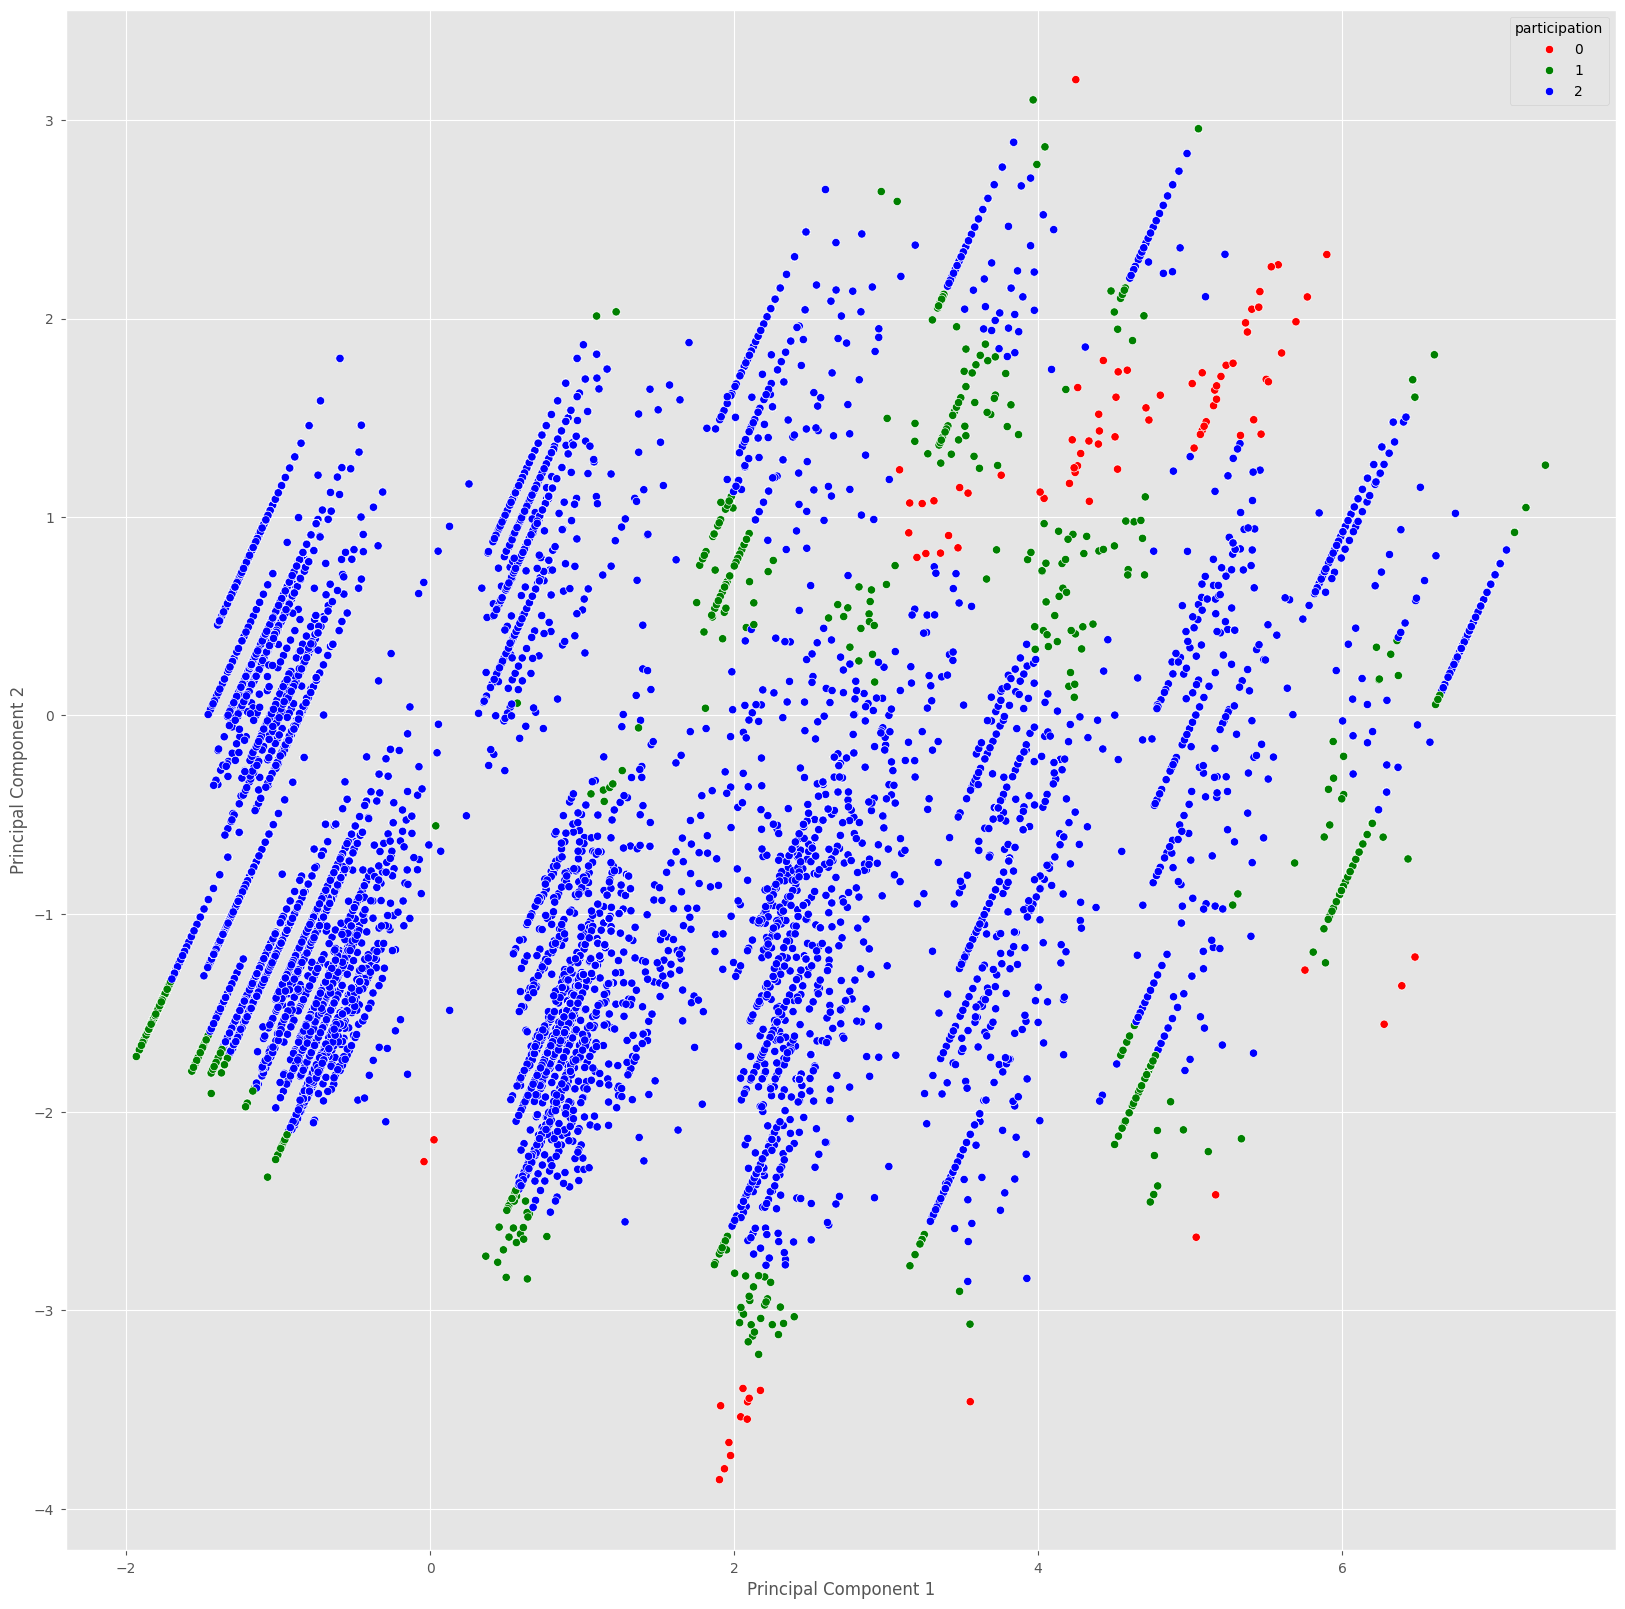

In [151]:
sns.scatterplot(data=pca_df,x='Principal Component 1',y='Principal Component 2',hue='participation',palette=['red', 'green', 'blue'])

In [152]:
sns.scatterplot(data=df,x=0,y=1,hue='participation')

ValueError: Could not interpret value `participation` for `hue`. An entry with this name does not appear in `data`.

In [154]:
pca_df.groupby(['participation'])['id'].count().to_frame()

,id
participation,
0,118
1,1713
2,26736


In [155]:
pca_df

,Principal Component 1,Principal Component 2,target,id,new_column,participation
0,2.507685,-2.644639,1.0,0,"[cube2_cluster0, cube3_cluster0]",2
1,2.311254,-1.051588,1.0,1,"[cube3_cluster0, cube4_cluster0]",2
2,-0.998735,1.121642,0.0,2,"[cube2_cluster1, cube3_cluster0]",2
3,-0.890121,1.302955,0.0,3,"[cube2_cluster1, cube3_cluster0]",2
4,-0.445072,-0.589750,0.0,4,"[cube1_cluster0, cube2_cluster1]",2
...,...,...,...,...,...,...
28562,-1.163899,0.845926,0.0,28562,"[cube2_cluster1, cube3_cluster0]",2
28563,-0.790517,-1.054533,0.0,28563,"[cube0_cluster0, cube1_cluster0]",2
28564,2.219071,-0.875161,1.0,28564,"[cube3_cluster0, cube4_cluster0]",2
28565,-0.338128,-0.830394,1.0,28565,"[cube1_cluster0, cube2_cluster1]",2
